# Benchmarks for OO Game Design

First lets load in our benchmark files generated from the C++ program

In [1]:
import numpy as np

renderFile=open('./renderBench.txt',"r")
renderData=renderFile.readlines()

updateFile=open('./updateBench.txt',"r")
updateData=updateFile.readlines()
timings={}
updateDurations=[]
renderDurations=[]
updateResolution=''
renderResolution=''
for i in updateData :
    if 'Duration' in i :
        data=i.split('\t')
        updateDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        updateResolution=data[2]
        
for i in renderData :
    if 'Duration' in i :
        data=i.split('\t')
        renderDurations.append(int(data[1]))
    elif 'Resolution' in i :
        data=i.split(' ')
        renderResolution=data[2]
print('Number of elements {0}'.format(len(renderDurations)))
timings['render']=renderDurations
timings['update']=updateDurations


Number of elements 1517


Now we can do some data analysis on the times and see what happens

In [2]:
import pandas as pd
#import matplotlib as plt
import matplotlib.pyplot as plt

%matplotlib inline

df=pd.DataFrame(data=timings)
df.describe(percentiles=[.25, .5, .75, 0.9, 0.99, 0.999])


,render,update
count,1517.000000,1517.000000
mean,83.373764,12222.058009
std,336.233776,943.794034
min,43.000000,10992.000000
25%,53.000000,11673.000000
50%,60.000000,11987.000000
75%,85.000000,12385.000000
90%,110.000000,13201.400000
99%,187.720000,16290.720000
99.9%,2006.176000,18385.800000


Text(0.0, 0.5, 'Number of Samples')

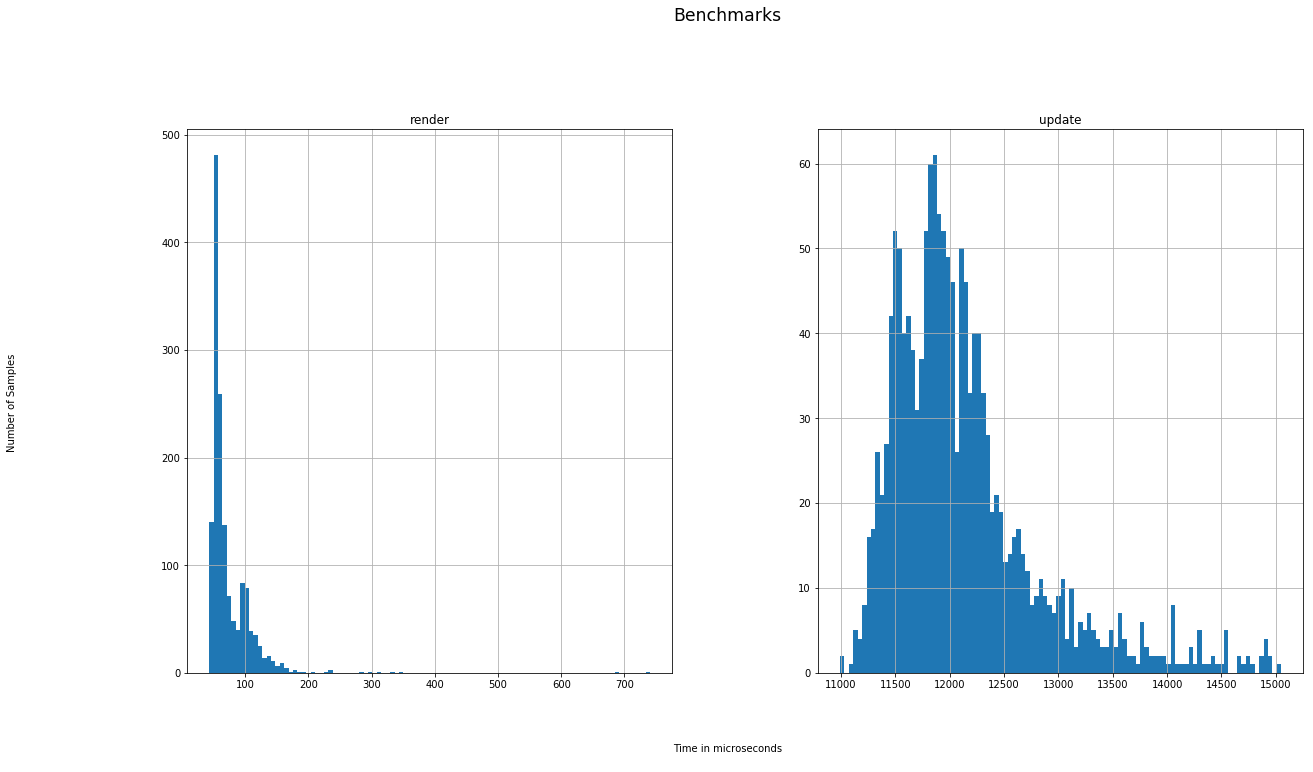

In [4]:
S = df
# keep only the ones that are within +3 to -3 standard deviations  
S=  S[~((S-S.mean()).abs() > 3*S.std())]

ndf = pd.DataFrame(data=S)

# set up figure & axes
fig, axes = plt.subplots(nrows=1, ncols=2, sharex=False, sharey=False,
                        figsize=(20, 10))

ndf.hist(grid=True,  bins=100,ax=axes )

# set title and axis labels
plt.suptitle('Benchmarks', x=0.5, y=1.05, ha='center', fontsize='xx-large')
fig.text(0.5, 0.0, 'Time in {0}'.format(renderResolution), ha='center')
fig.text(0.0, 0.5, 'Number of Samples', va='center', rotation='vertical')
